In [51]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from colorama import Fore, Style, init
from tabulate import tabulate
from termcolor import colored
import seaborn as sns
from IPython.display import display, HTML
from PIL import ImageGrab
import math

# checking the working directory and the folder contained in it 

In [52]:
ls

 Volume in drive D is Data
 Volume Serial Number is 125B-8C1E

 Directory of D:\STOCK MARKET ASSIGNMENT

14-Jan-24  05:22 PM    <DIR>          .
14-Jan-24  03:57 PM    <DIR>          .ipynb_checkpoints
10-Jan-24  01:04 PM               779 Annexure-I.csv
10-Jan-24  03:31 PM                72 clustering.ipynb
07-Jan-24  01:47 PM         1,325,783 DATA.zip
10-Jan-24  07:35 PM    <DIR>          DATA_ZIP
14-Jan-24  01:42 PM         1,965,209 Exploratory data analysis.ipynb
14-Jan-24  10:29 AM         1,359,902 machine learning assignment.docx
14-Jan-24  05:22 PM           164,830 Regression.ipynb
14-Jan-24  01:42 PM    <DIR>          screenshots
               6 File(s)      4,816,575 bytes
               4 Dir(s)  975,168,622,592 bytes free


# Checking the intial data 

In [53]:
os.getcwd()

'D:\\STOCK MARKET ASSIGNMENT'

In [54]:
lis = os.listdir("DATA_ZIP")

In [55]:
def read_first_one_rows(folder_path):
    data_frames = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)
            company_name = file_name.split(".")[0]
            df = pd.read_csv(file_path, nrows=1)
            df['Company'] = company_name
            data_frames.append(df)
    result_df = pd.concat(data_frames, ignore_index=True)
    return result_df
folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP"
result_dataframe = read_first_one_rows(folder_path)
result_dataframe

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,01-10-2010,9.290000,9.390000,9.210000,9.290000,8.758067,3603800,AAL
1,01-10-2010,10.219643,10.235000,10.048214,10.090000,8.719163,448142800,AAPL
2,01-10-2010,42.779999,43.259998,41.869999,43.230000,36.766212,159100,ALGT
3,01-10-2010,12.932500,12.962500,12.367500,12.447500,10.972344,1663600,ALK
4,01-10-2010,157.080002,157.440002,152.199997,153.710007,153.710007,8683400,AMZN
5,04-01-2010,16.709677,16.930876,16.663595,16.894009,12.665321,2144300,BCS
6,01-10-2010,25.120001,25.879999,25.100000,25.750000,24.757708,5778700,BHC
7,04-01-2010,49.902344,51.035156,49.765625,50.771484,34.852165,734200,CS
8,01-10-2010,11.750000,12.010000,11.710000,12.010000,10.668407,9094900,DAL
9,04-01-2010,69.103050,70.162216,68.893127,69.875954,59.037861,469500,DB


In [56]:
result_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       25 non-null     object 
 1   Open       25 non-null     float64
 2   High       25 non-null     float64
 3   Low        25 non-null     float64
 4   Close      25 non-null     float64
 5   Adj Close  25 non-null     float64
 6   Volume     25 non-null     int64  
 7   Company    25 non-null     object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.7+ KB


#### Date represents the date of the trading day of a company

#### open represent the opening price of the stock for the trading day

#### High represent the highest price of the stock for the trading day

#### low represent the lowest price registered for the trading day

#### close represent the closing price of the stock on a trading day

#### adjusted close price of the stock on a trading day is used to indicate the closing price with taking dividends, stock splits and new stock offerings into account it provides a more accurate representation of a stocks value

#### volume refers to the total number of shares oa particular stock traded during a given period of time typically a trading day

#### adjusted closing price represent the price given after adjusting the price after various corporate actions such as dividends, stock splits, impact of stock value etc

In [57]:
print(result_dataframe.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')


In [58]:
df = pd.read_csv(r"D:\STOCK MARKET ASSIGNMENT\Annexure-I.csv")
unique_industries = df['Industry'].unique()
df_styled = df.copy()
print(tabulate(df_styled, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═════════════════╤═════════════════════════════╕
│    │ Ticker   │ Industry        │ Company Name                │
╞════╪══════════╪═════════════════╪═════════════════════════════╡
│  0 │ AAL      │ Aviation        │ American Airlines Group Inc │
├────┼──────────┼─────────────────┼─────────────────────────────┤
│  1 │ ALGT     │ Aviation        │ Allegiant Travel Company    │
├────┼──────────┼─────────────────┼─────────────────────────────┤
│  2 │ ALK      │ Aviation        │ Alaska Air Group Inc        │
├────┼──────────┼─────────────────┼─────────────────────────────┤
│  3 │ DAL      │ Aviation        │ Delta Air Lines Inc         │
├────┼──────────┼─────────────────┼─────────────────────────────┤
│  4 │ HA       │ Aviation        │ Hawaiian Holdings Inc       │
├────┼──────────┼─────────────────┼─────────────────────────────┤
│  5 │ LUV      │ Aviation        │ Southwest Airlines Co       │
├────┼──────────┼─────────────────┼─────────────────────────────┤
│  6 │ BCS

In [59]:
set(result_dataframe["Company"])-set(list(df_styled["Ticker"]))

{'SP500', 'UNH'}

In [60]:
print(list(df_styled.Ticker))

['AAL', 'ALGT', 'ALK', 'DAL', 'HA', 'LUV', 'BCS', 'CS', 'DB', 'GS', 'MS', 'WFC', 'JNJ', 'MRK', 'PFE', 'UNH ', 'BHC', 'RHHBY', 'AAPL', 'AMZN', 'FB', 'GOOG', 'IBM', 'MSFT']


In [61]:
df_styled.columns

Index(['Ticker', 'Industry', 'Company Name'], dtype='object')

In [62]:
tech_mask = df_styled['Industry'].str.lower().str.contains('technology')
tech_df = df_styled[tech_mask]
tech = list(tech_df["Ticker"])
tech_lis = []
for i in tech:
    i = i+".csv"
    tech_lis.append(i)
tech_lis    

['AAPL.csv', 'AMZN.csv', 'FB.csv', 'GOOG.csv', 'IBM.csv', 'MSFT.csv']

In [63]:
fin_mask = df_styled['Industry'].str.lower().str.contains('finance')
fin_df = df_styled[fin_mask]
fin = list(fin_df["Ticker"])
fin_lis = []
for i in fin:
    i = i+".csv"
    fin_lis.append(i)
fin_lis

['BCS.csv', 'CS.csv', 'DB.csv', 'GS.csv', 'MS.csv', 'WFC.csv']

In [64]:
avi_mask = df_styled['Industry'].str.lower().str.contains('aviation')
avi_df = df_styled[avi_mask]
avi = list(avi_df["Ticker"])
avi_lis = []
for i in avi:
    i = i+".csv"
    avi_lis.append(i)
avi_lis

['AAL.csv', 'ALGT.csv', 'ALK.csv', 'DAL.csv', 'HA.csv', 'LUV.csv']

# the UNH company in the annexure file seems to have a space in the name hence it is repeated twice

# Analysis of Technology stocks

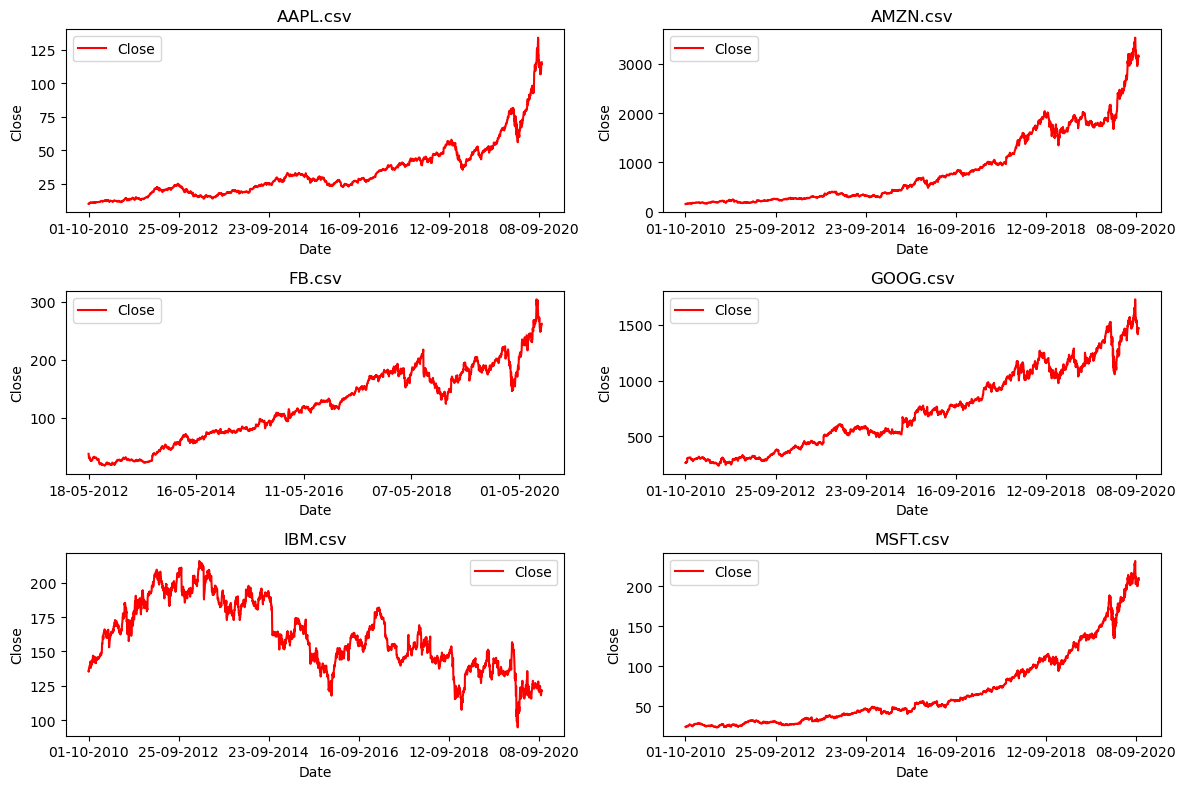

In [65]:
num_files = len(tech_lis)
num_rows = math.ceil(num_files / 2)  
num_cols = min(2, num_files) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
# Flatten the axes if there's only one row or column
axes = axes.flatten() if num_files > 1 else [axes]
# Plot each file
for i, (file_name, ax) in enumerate(zip(tech_lis, axes)):
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data.set_index('Date', inplace=True)
    data.plot.line(y="Close", use_index=True, color="red", ax=ax)
    ax.set_title(file_name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close')
plt.tight_layout()
plt.show()

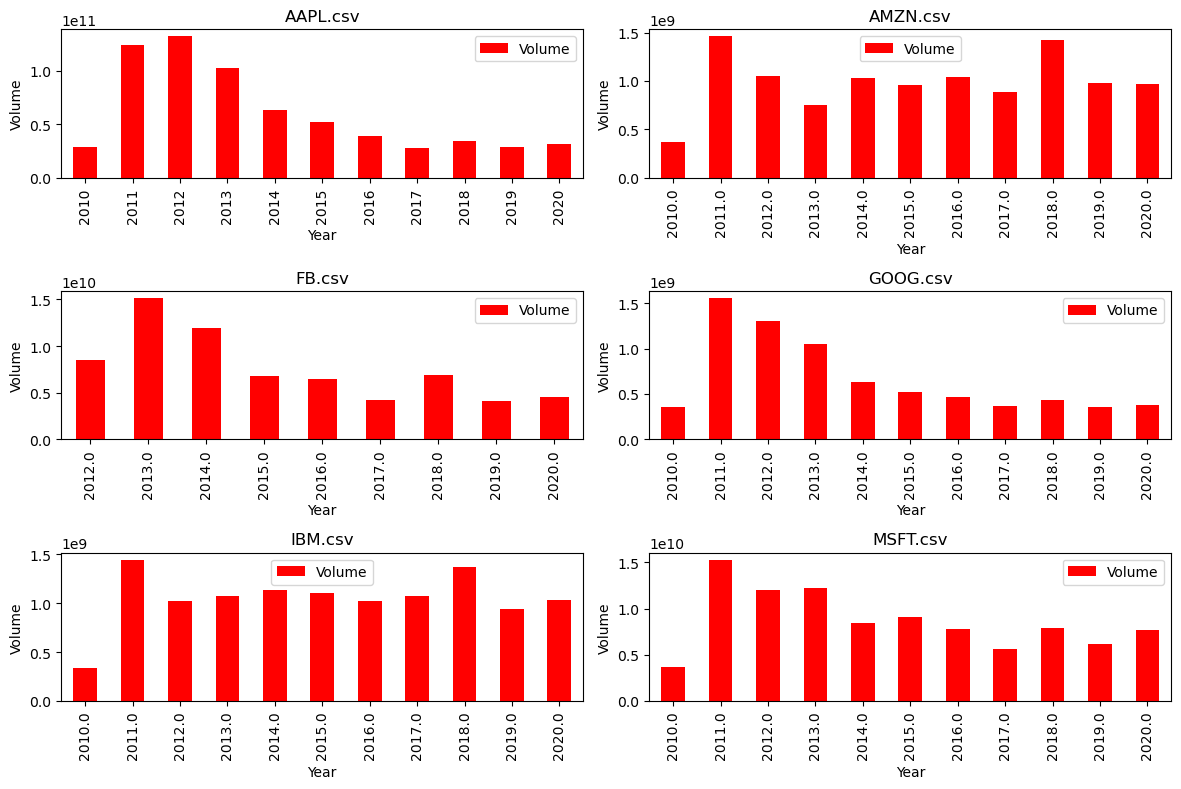

In [66]:
num_files = len(tech_lis)
num_rows = math.ceil(num_files / 2)
num_cols = min(2, num_files)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten() if num_files > 1 else [axes]
# Plot each file
for i, (file_name, ax) in enumerate(zip(tech_lis, axes)):
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    # Convert 'Date' column to datetime object with the correct format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
    # Extract the year from the 'Date' column
    data['Year'] = data['Date'].dt.year
    # Group data by year and sum the Volume for each year
    year_data = data.groupby('Year')['Volume'].sum().reset_index()  
    #  bar chart
    year_data.plot.bar(x='Year', y='Volume', color="red", ax=ax)
    ax.set_title(file_name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Volume')
plt.tight_layout()
plt.show()

# Analysis for finance companies 

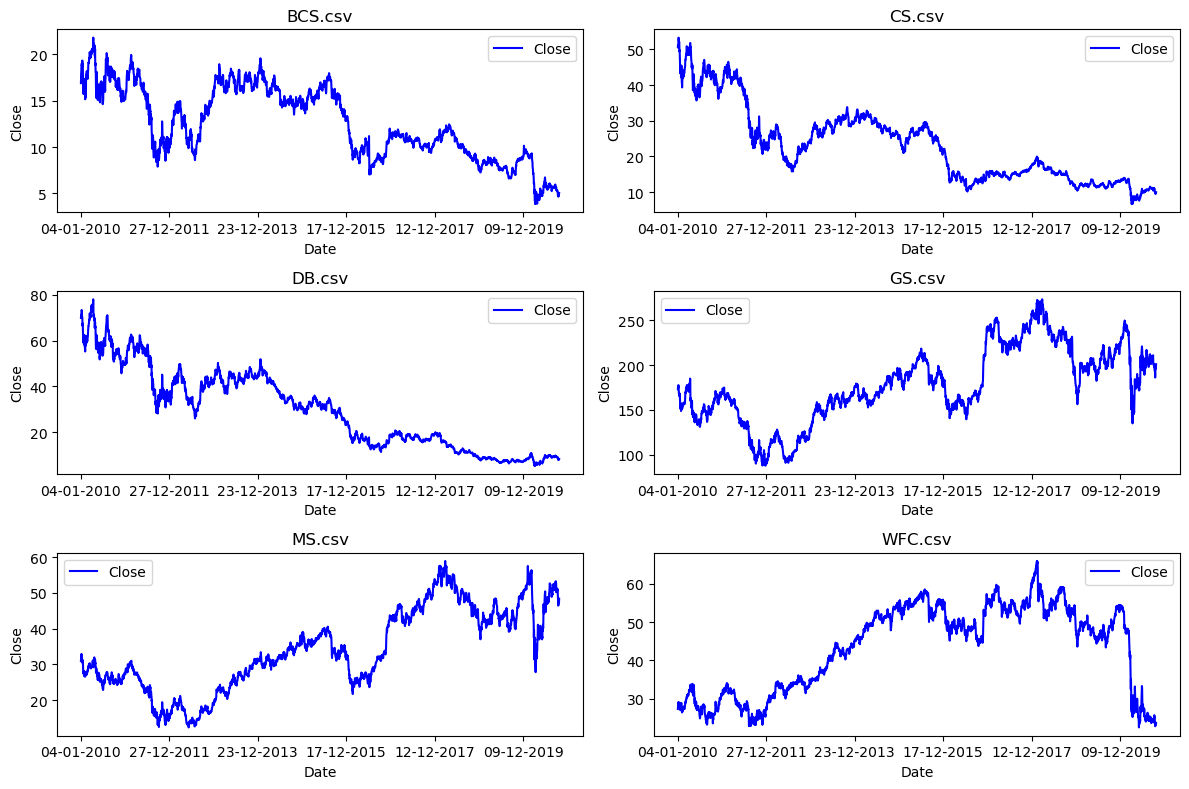

In [67]:
folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP"
num_files = len(fin_lis)
num_rows = math.ceil(num_files / 2)  
num_cols = min(2, num_files) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
# Flatten the axes if there's only one row or column
axes = axes.flatten() if num_files > 1 else [axes]
# Plot each file
for i, (file_name, ax) in enumerate(zip(fin_lis, axes)):
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data.set_index('Date', inplace=True)
    data.plot.line(y="Close", use_index=True, color="blue", ax=ax)
    ax.set_title(file_name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close')
plt.tight_layout()
plt.show()

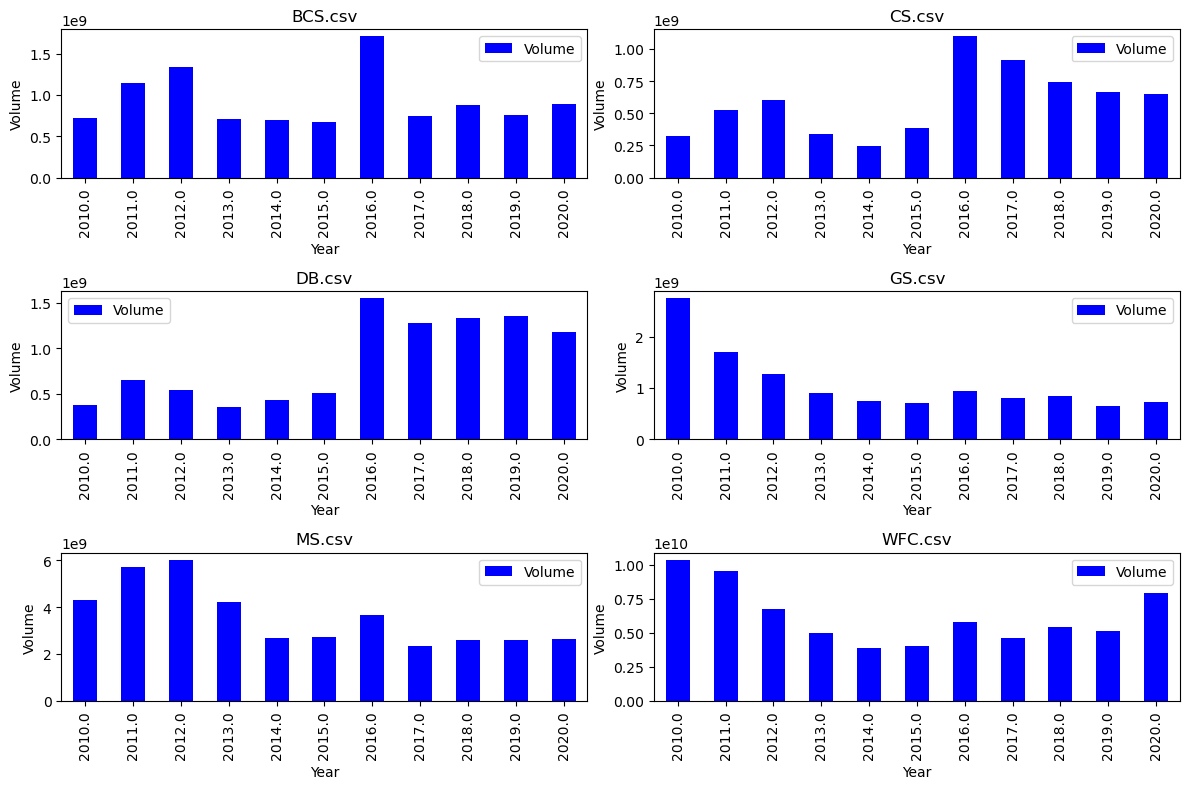

In [68]:
num_files = len(fin_lis)
num_rows = math.ceil(num_files / 2)
num_cols = min(2, num_files)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten() if num_files > 1 else [axes]
# Plot each file
for i, (file_name, ax) in enumerate(zip(fin_lis, axes)):
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    # Convert 'Date' column to datetime object with the correct format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
    # Extract the year from the 'Date' column
    data['Year'] = data['Date'].dt.year
    # Group data by year and sum the Volume for each year
    year_data = data.groupby('Year')['Volume'].sum().reset_index()
    #  bar chart
    year_data.plot.bar(x='Year', y='Volume', color="blue", ax=ax)
    ax.set_title(file_name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Volume')
plt.tight_layout()
plt.show()

# Analysis of aviation companies 

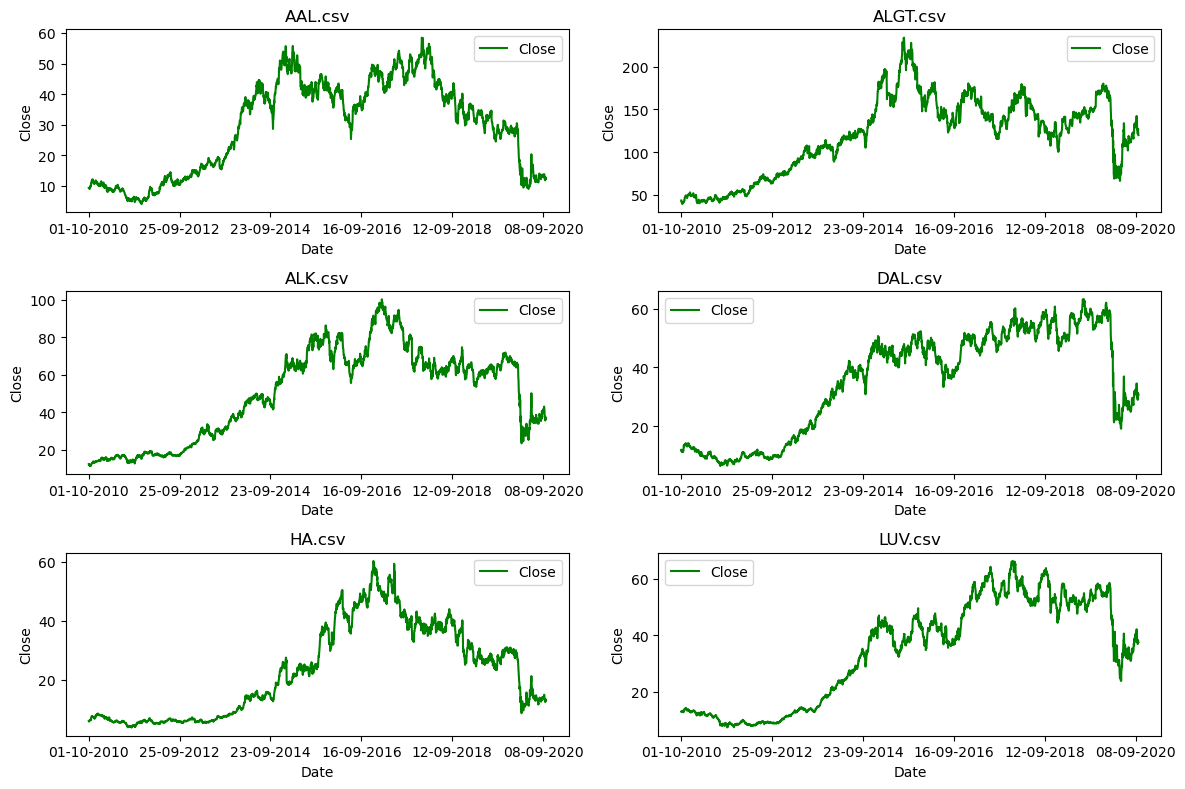

In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math
folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP"
num_files = len(avi_lis)
num_rows = math.ceil(num_files / 2)  
num_cols = min(2, num_files) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
# Flatten the axes if there's only one row or column
axes = axes.flatten() if num_files > 1 else [axes]
# Plot each file
for i, (file_name, ax) in enumerate(zip(avi_lis, axes)):
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data.set_index('Date', inplace=True)
    data.plot.line(y="Close", use_index=True, color="green", ax=ax)
    ax.set_title(file_name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Close')
plt.tight_layout()
plt.show()

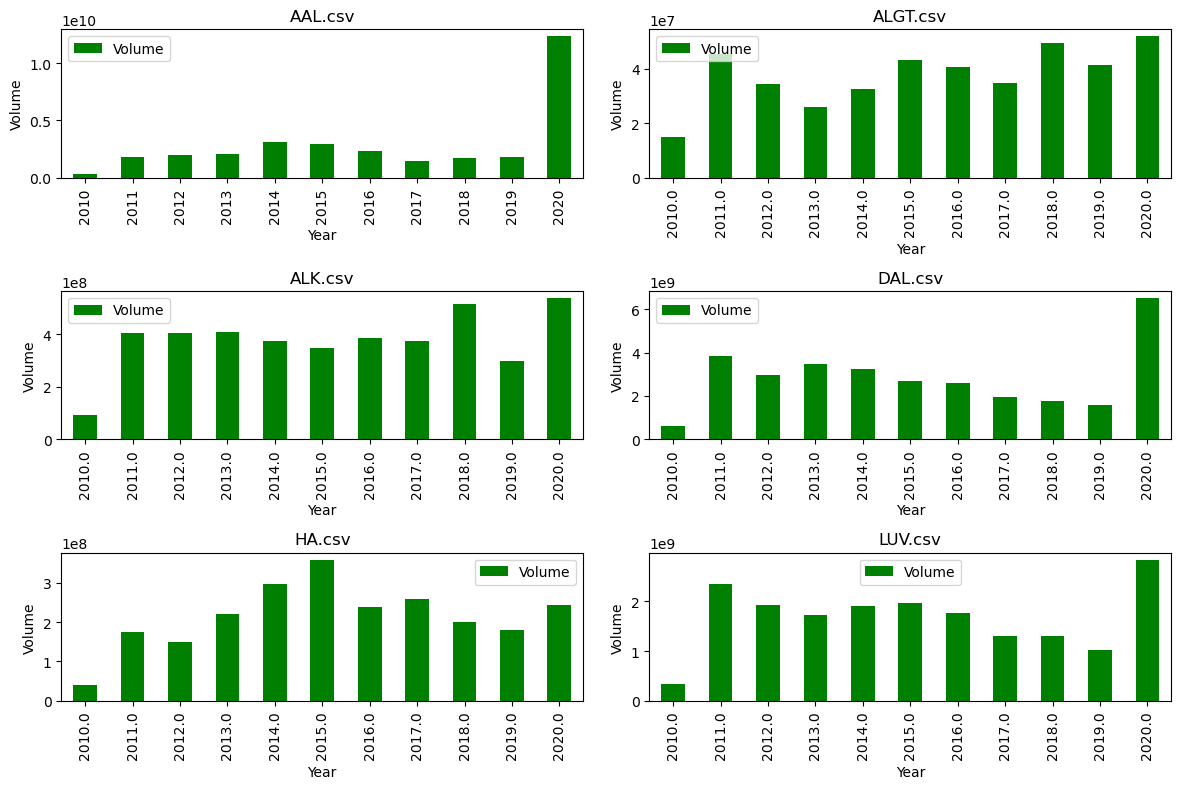

In [70]:
num_files = len(avi_lis)
num_rows = math.ceil(num_files / 2)
num_cols = min(2, num_files)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten() if num_files > 1 else [axes]
# Plot each file
for i, (file_name, ax) in enumerate(zip(avi_lis, axes)):
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    # Convert 'Date' column to datetime object with the correct format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
    # Extract the year from the 'Date' column
    data['Year'] = data['Date'].dt.year
    # Group data by year and sum the Volume for each year
    year_data = data.groupby('Year')['Volume'].sum().reset_index()
    #  bar chart
    year_data.plot.bar(x='Year', y='Volume', color="green", ax=ax)
    ax.set_title(file_name)
    ax.set_xlabel('Year')
    ax.set_ylabel('Volume')
plt.tight_layout()
plt.show()

In [71]:
closing_prices_df = pd.DataFrame()
for file_name in tech_lis:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data = data.drop_duplicates(subset='Date')
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    # Extract the 'Close' column and add it to the closing_prices_df
    closing_prices_df[file_name] = data['Close']
closing_prices_df

,AAPL.csv,AMZN.csv,FB.csv,GOOG.csv,IBM.csv,MSFT.csv
Date,,,,,,
01-10-2010,10.090000,153.710007,NaN,261.828613,135.639999,24.379999
04-10-2010,9.951428,155.389999,NaN,260.199707,135.250000,23.910000
05-10-2010,10.319285,160.869995,NaN,268.110046,137.660004,24.350000
06-10-2010,10.328215,155.399994,NaN,266.177307,137.839996,24.430000
07-10-2010,10.329286,156.270004,NaN,264.015411,138.720001,24.530001
...,...,...,...,...,...,...
24-09-2020,108.220001,3019.790039,249.529999,1428.290039,118.089996,203.190002
25-09-2020,112.279999,3095.129883,254.820007,1444.959961,118.949997,207.820007
28-09-2020,114.959999,3174.050049,256.820007,1464.520020,121.730003,209.440002


<Axes: >

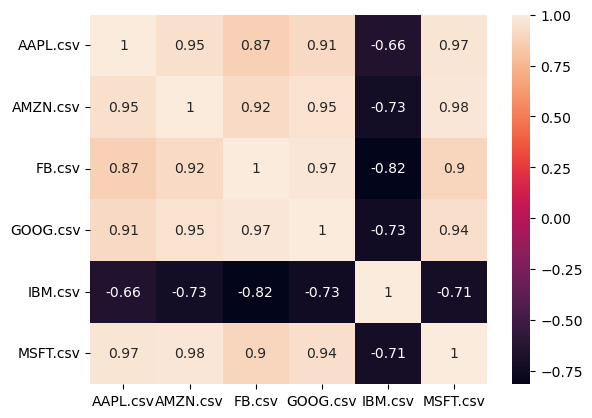

In [72]:
sns.heatmap(closing_prices_df.corr(),annot=True)

In [73]:
vol_prices_df = pd.DataFrame()
for file_name in tech_lis:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    # Remove duplicate rows based on 'Date' column
    data = data.drop_duplicates(subset='Date')
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    vol_prices_df[file_name] = data['Volume']
vol_prices_df

,AAPL.csv,AMZN.csv,FB.csv,GOOG.csv,IBM.csv,MSFT.csv
Date,,,,,,
01-10-2010,448142800,8683400.0,NaN,4466600.0,5621200.0,62672300.0
04-10-2010,435302000,5346500.0,NaN,3895400.0,4059900.0,98143400.0
05-10-2010,501967200,5620000.0,NaN,7040400.0,6202500.0,78152900.0
06-10-2010,670868800,6060800.0,NaN,5545200.0,4783000.0,50489700.0
07-10-2010,408399600,4622000.0,NaN,4809400.0,6440800.0,50096100.0
...,...,...,...,...,...,...
24-09-2020,167743300,5529400.0,20006800.0,1450200.0,3546200.0,31202500.0
25-09-2020,149981400,4615200.0,18351300.0,1323000.0,2953700.0,29437300.0
28-09-2020,137672400,4224200.0,18826300.0,2007900.0,3509200.0,32004900.0


<Axes: >

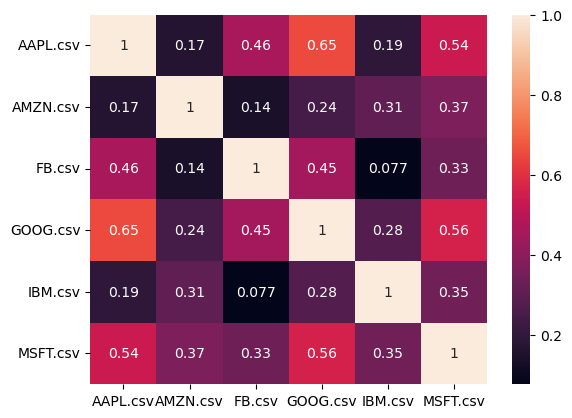

In [74]:
sns.heatmap(vol_prices_df.corr(),annot=True)

In [75]:
closing_prices_df = pd.DataFrame()
for file_name in fin_lis:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data = data.drop_duplicates(subset='Date')
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    # Extract the 'Close' column and add it to the closing_prices_df
    closing_prices_df[file_name] = data['Close']
closing_prices_df

,BCS.csv,CS.csv,DB.csv,GS.csv,MS.csv,WFC.csv
Date,,,,,,
04-01-2010,16.894009,50.771484,69.875954,173.080002,30.910000,27.320000
05-01-2010,17.824884,51.191406,71.211830,176.139999,32.040001,28.070000
06-01-2010,18.129032,50.478516,69.980919,174.259995,32.450001,28.110001
07-01-2010,18.801844,52.519531,70.772903,177.669998,32.919998,29.129999
08-01-2010,18.967741,53.291016,73.330154,174.309998,32.250000,28.860001
...,...,...,...,...,...,...
25-09-2020,4.700000,9.480000,8.000000,194.949997,47.040001,23.639999
28-09-2020,4.990000,9.900000,8.430000,199.070007,48.380001,23.820000
29-09-2020,4.960000,9.830000,8.270000,196.789993,47.240002,23.260000


<Axes: >

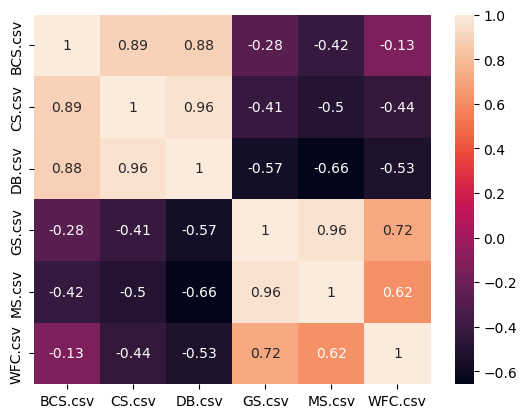

In [76]:
sns.heatmap(closing_prices_df.corr(),annot=True)

In [77]:
vol_prices_df = pd.DataFrame()
for file_name in fin_lis:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    # Remove duplicate rows based on 'Date' column
    data = data.drop_duplicates(subset='Date')
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    vol_prices_df[file_name] = data['Volume']
vol_prices_df

,BCS.csv,CS.csv,DB.csv,GS.csv,MS.csv,WFC.csv
Date,,,,,,
04-01-2010,2144300.0,734200.0,469500.0,9135000.0,20371000.0,39335700.0
05-01-2010,2710600.0,447700.0,503300.0,11659400.0,22523400.0,55416000.0
06-01-2010,2124100.0,751200.0,495000.0,7381100.0,17028500.0,33237000.0
07-01-2010,3932100.0,833700.0,700100.0,8727400.0,18693000.0,61649000.0
08-01-2010,3055200.0,706900.0,763900.0,7268100.0,15993400.0,35508700.0
...,...,...,...,...,...,...
25-09-2020,3185200.0,2241100.0,5570900.0,3106000.0,9816000.0,30229900.0
28-09-2020,3486300.0,2165500.0,4359600.0,3280100.0,9466200.0,41103500.0
29-09-2020,3701800.0,1767800.0,4034000.0,2400000.0,11355600.0,38416300.0


<Axes: >

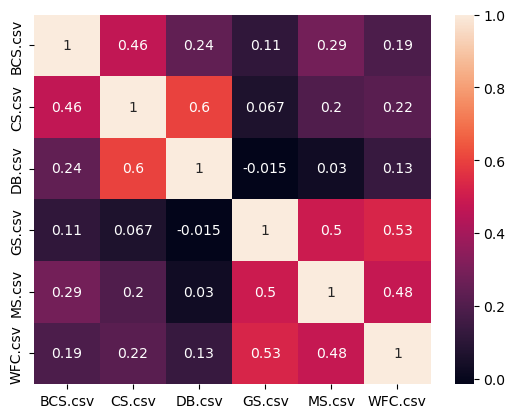

In [78]:
sns.heatmap(vol_prices_df.corr(),annot=True)

In [79]:
closing_prices_df = pd.DataFrame()
for file_name in avi_lis:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data = data.drop_duplicates(subset='Date')
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    # Extract the 'Close' column and add it to the closing_prices_df
    closing_prices_df[file_name] = data['Close']
closing_prices_df

,AAL.csv,ALGT.csv,ALK.csv,DAL.csv,HA.csv,LUV.csv
Date,,,,,,
01-10-2010,9.29,43.230000,12.447500,12.010000,5.96,12.940000
04-10-2010,9.12,41.590000,12.142500,11.510000,5.75,12.820000
05-10-2010,9.23,42.099998,12.215000,11.830000,5.85,13.020000
06-10-2010,9.23,41.950001,12.187500,11.780000,5.97,12.940000
07-10-2010,9.24,41.700001,11.625000,11.770000,6.15,12.880000
...,...,...,...,...,...,...
24-09-2020,11.77,121.500000,35.700001,29.010000,12.40,36.860001
25-09-2020,12.29,123.760002,36.700001,29.780001,12.80,37.099998
28-09-2020,12.76,127.110001,37.540001,31.340000,13.38,38.240002


<Axes: >

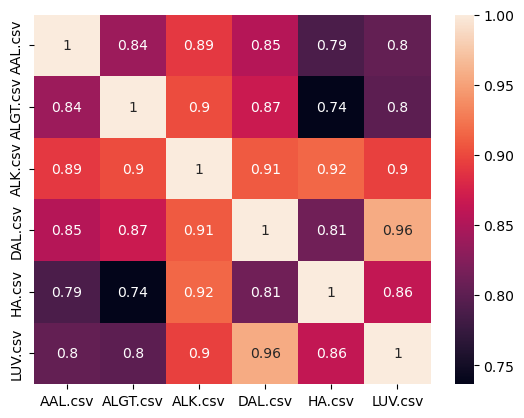

In [80]:
sns.heatmap(closing_prices_df.corr(),annot=True)

In [81]:
vol_prices_df = pd.DataFrame()
for file_name in avi_lis:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    
    # Remove duplicate rows based on 'Date' column
    data = data.drop_duplicates(subset='Date')
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)

    vol_prices_df[file_name] = data['Volume']

vol_prices_df


,AAL.csv,ALGT.csv,ALK.csv,DAL.csv,HA.csv,LUV.csv
Date,,,,,,
01-10-2010,3603800,159100.0,1663600.0,9094900.0,645400.0,5722500.0
04-10-2010,3856800,189700.0,1512400.0,7916400.0,618900.0,6537700.0
05-10-2010,3896600,175000.0,2567200.0,12624100.0,534800.0,8060000.0
06-10-2010,3230200,187200.0,1043600.0,10124100.0,2563900.0,7457000.0
07-10-2010,3877700,162700.0,7682400.0,7162500.0,1115200.0,3413900.0
...,...,...,...,...,...,...
24-09-2020,49163200,172300.0,3326000.0,22257800.0,879700.0,10798800.0
25-09-2020,43764000,115100.0,1767600.0,21831500.0,923400.0,9297300.0
28-09-2020,63558200,188400.0,2922800.0,22098400.0,1076800.0,9235200.0


<Axes: >

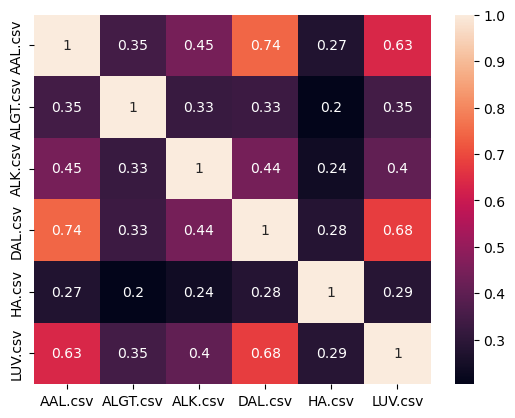

In [82]:
sns.heatmap(vol_prices_df.corr(),annot=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


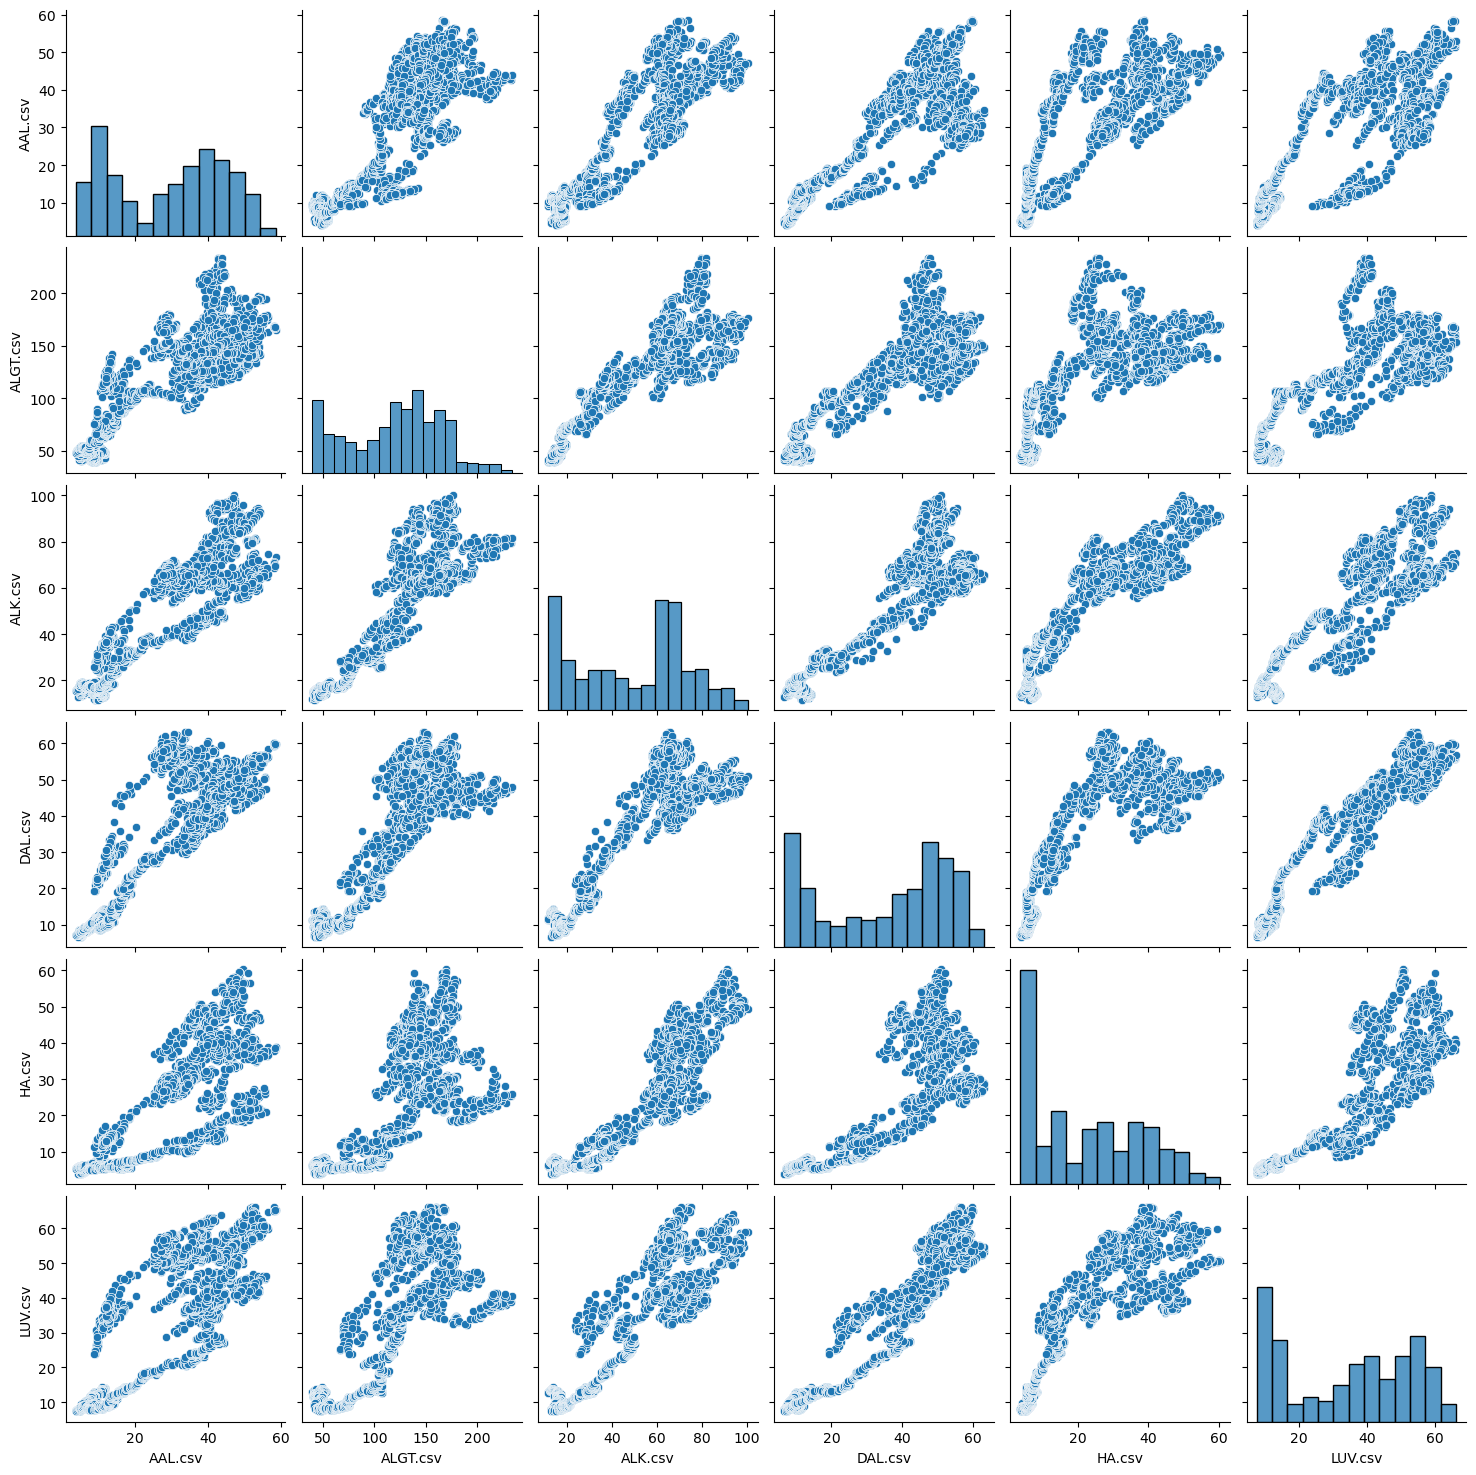

In [83]:
sns.pairplot(closing_prices_df)

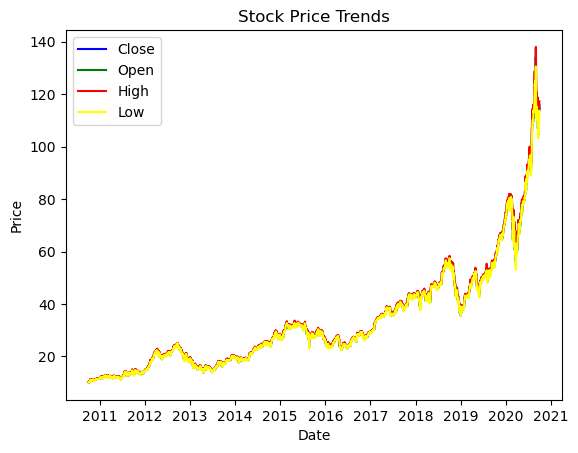

In [84]:
folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP\AAPL.csv"
data = pd.read_csv(folder_path)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
plt.plot(data.index, data["Close"], label="Close", color="blue")
plt.plot(data.index, data["Open"], label="Open", color="green")
plt.plot(data.index, data["High"], label="High", color="red")
plt.plot(data.index, data["Low"], label="Low", color="yellow")
plt.legend()  
plt.title("Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

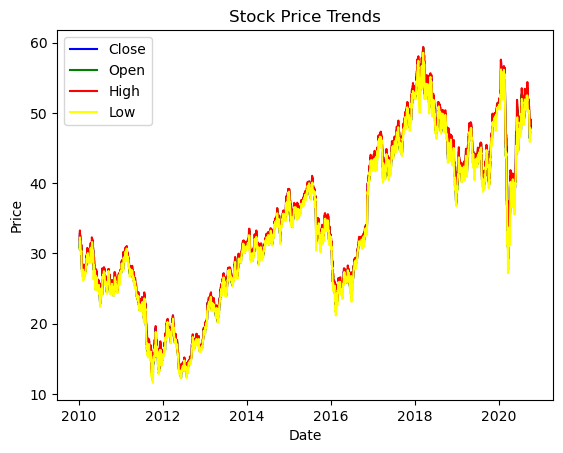

In [85]:
folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP\MS.csv"
data = pd.read_csv(folder_path)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
plt.plot(data.index, data["Close"], label="Close", color="blue")
plt.plot(data.index, data["Open"], label="Open", color="green")
plt.plot(data.index, data["High"], label="High", color="red")
plt.plot(data.index, data["Low"], label="Low", color="yellow")
plt.legend()  
plt.title("Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

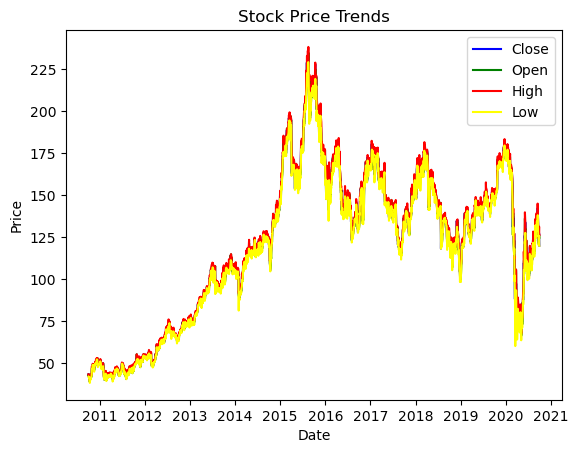

In [86]:
folder_path = r"D:\STOCK MARKET ASSIGNMENT\DATA_ZIP\ALGT.csv"
data = pd.read_csv(folder_path)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.set_index('Date', inplace=True)
plt.plot(data.index, data["Close"], label="Close", color="blue")
plt.plot(data.index, data["Open"], label="Open", color="green")
plt.plot(data.index, data["High"], label="High", color="red")
plt.plot(data.index, data["Low"], label="Low", color="yellow")
plt.legend()  
plt.title("Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [1]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     ------------- ---------------------- 41.0/109.5 kB 393.8 kB/s eta 0:00:01
     ----------------------------------- 109.5/109.5 kB 793.8 kB/s eta 0:00:00
